In [6]:
"""
Visualization code to display found State Values and the optimum policy on the maze. 
"""
# First, import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Maze Visualization

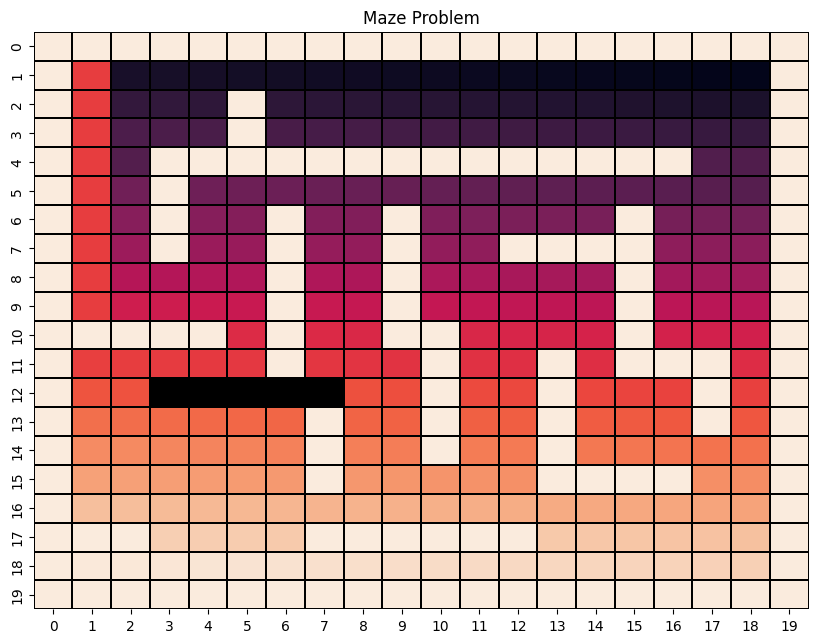

In [14]:
""" 
Define and Visualize State Matrix 
See https://seaborn.pydata.org/generated/seaborn.heatmap.html for more info on arguments
"""
# This is a random matrix for example purposes. 
# Matrix is defined as 20x20 instead of 18x18 stated in the project description in order to treat borders as wall states
State_Matrix = \
    np.array([[0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
              [0, 100, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
              [0, 100, 215, 216, 217,   0, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 0],
              [0, 100, 198, 199, 200,   0, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 0],
              [0, 100, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195, 196, 0],
              [0, 100, 177,   0, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 0],
              [0, 100, 163,   0, 164, 165,   0, 166, 167,   0, 168, 169, 170, 171, 172,   0, 173, 174, 175, 0],
              [0, 100, 152,   0, 153, 154,   0, 155, 156,   0, 157, 158,   0,   0,   0,   0, 159, 160, 161, 0],
              [0, 100, 137, 138, 139, 140,   0, 141, 142,   0, 143, 144, 145, 146, 147,   0, 148, 149, 150, 0],
              [0, 100, 122, 123, 124, 125,   0, 126, 127,   0, 128, 129, 130, 131, 132,   0, 133, 134, 135, 0],
              [0,   0,   0,   0,   0, 111,   0, 112, 113,   0,   0, 114, 115, 116, 117,   0, 118, 119, 120, 0],
              [0,  99, 100, 101, 102, 103,   0, 104, 105, 106,   0, 107, 108,   0, 109,   0,   0,   0, 110, 0],
              [0,  89,  90,   np.NAN,   np.NAN,   np.NAN,  np.NAN,   np.NAN,  91,  92,   0,  93,  94,   0,  95,  96,  97,   0,  98, 0],
              [0,  75,  76,  77,  78,  79,  80,   0,  81,  82,   0,  83,  84,   0,  85,  86,  87,   0,  88, 0],
              [0,  60,  61,  62,  63,  64,  65,   0,  66,  67,   0,  68,  69,   0,  70,  71,  72,  73,  74, 0],
              [0,  47,  48,  49,  50,  51,  52,   0,  53,  54,  55,  56,  57,   0,   0,   0,   0,  58,  59, 0],
              [0,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, 0],
              [0,   0,   0,  19,  20,  21,  22,   0,   0,   0,   0,   0,   0,  23,  24,  25,  26,  27,  28, 0],
              [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
              [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]])
        

plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
plt.title('Maze Problem')
plt.show()

# Coloring Specific Coordinates in the Maze

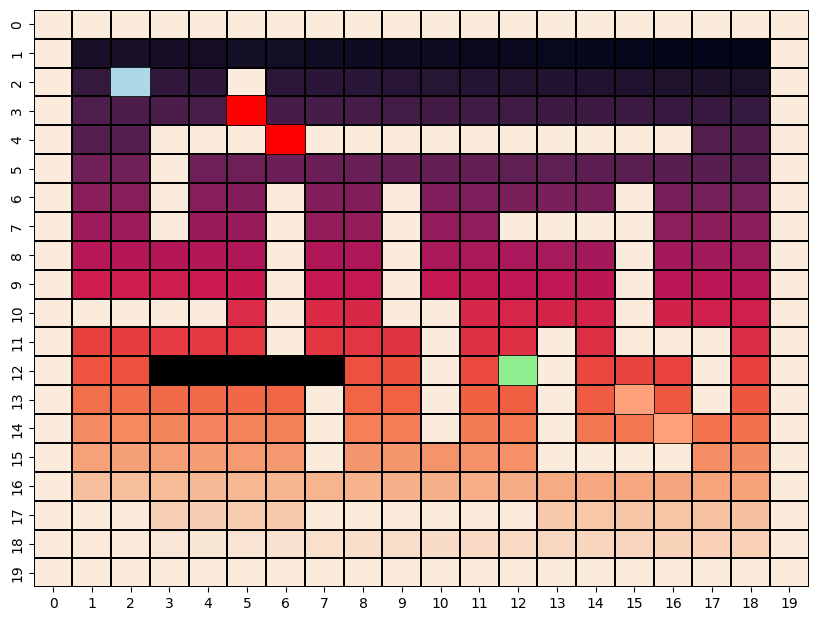

In [8]:
""" Function to always color the oil, bump, start, and green blocks.
 States are in the form of a list of (i,j) coordinates on the state matrix"""
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='red', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='lightsalmon', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))

# Example Use
plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=[(3,5),(4,6)], bump_states=[(13,15),(14,16)], \
                start_state=(2,2),end_state=(12,12))
plt.show()

# Drawing a path on the Maze

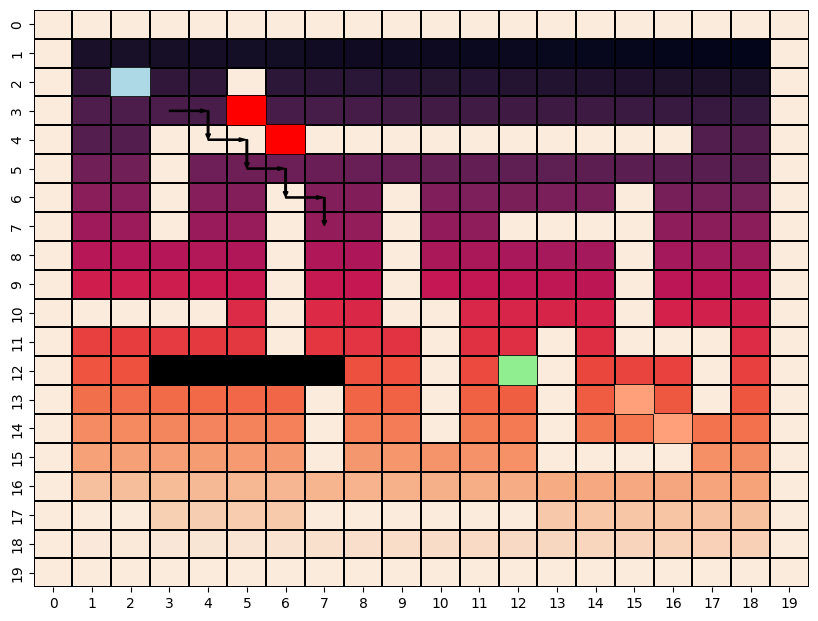

In [9]:
# Define heatmap first
plt.subplots(figsize=(10, 7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='rocket_r')
heatmap.set_facecolor('black') 
coloring_blocks(heatmap, oil_states=[(3,5),(4,6)], bump_states=[(13,15),(14,16)], \
                start_state=(2,2),end_state=(12,12))
    

# Plot the route from the start state to the end state.
# This is just an example, you may want to keep pi* coordinates and actions in a different way
path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
        ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]
for state_cr, direction in path:
    r = state_cr[0] # x_coordinate
    c = state_cr[1] # y_coordinate

    if direction == 'right':
        plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
    if direction == 'left':
        plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
    if direction == 'up':
        plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
    if direction == 'down':
        plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down

# Show plot
plt.show()

# NOTE: In your code, you may want limit the maximum number of states traveled for a calculated policy. So that, you can break the loop when the calculated policy never reaches to the end state

# Plotting State Values on the Maze

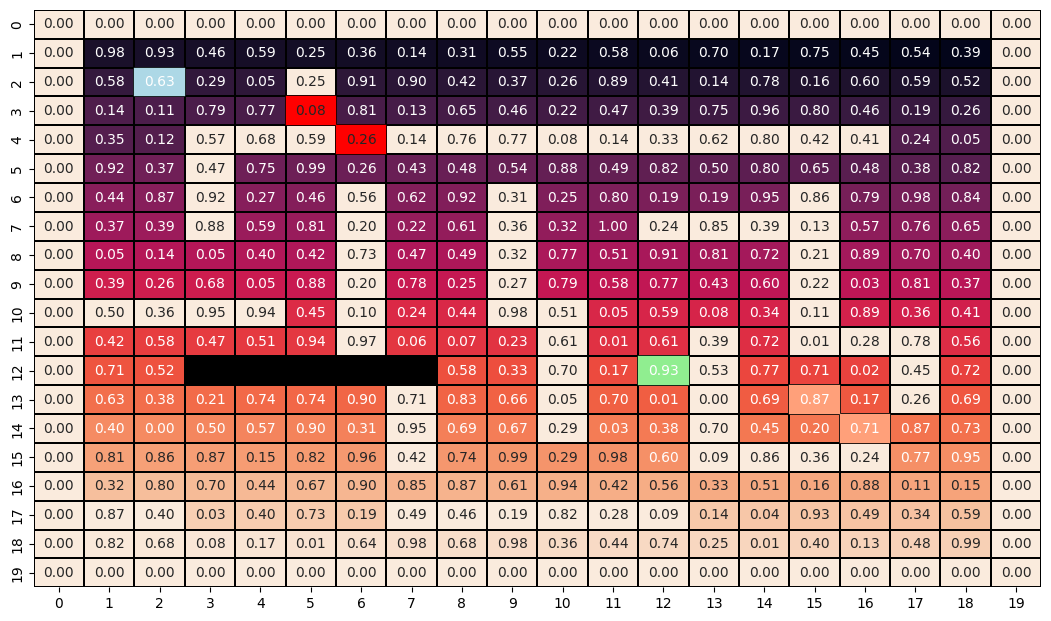

In [10]:
# plot the value function values on the heat map
plt.subplots(figsize=(13,7.5))

# Create a 2D matrix of zeros with size of 20 x 20 
State_Matrix_heatmap = np.zeros((20,20)) 

# Assume V_s is a 18x18 matrix with calculated state values. 
# For example purposes, it is defined as a random matrix here.
V_s = np.random.rand(18,18)

for i in range(18):
    for j in range(18):
        # Assign new 2D matrix with the value function value at the current state
        State_Matrix_heatmap[i+1, j+1] = V_s[i][j]

# Plot the new heatmap of the new value function values with the original state and coloring blocks
heatmap = sns.heatmap(State_Matrix, fmt=".2f", annot= State_Matrix_heatmap, linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')

heatmap.set_facecolor('black') # Color for the NA cells in the state matrix
coloring_blocks(heatmap, oil_states=[(3,5),(4,6)], bump_states=[(13,15),(14,16)], \
            start_state=(2,2),end_state=(12,12))
plt.show()